In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("grads.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df["Chance of Admit "]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

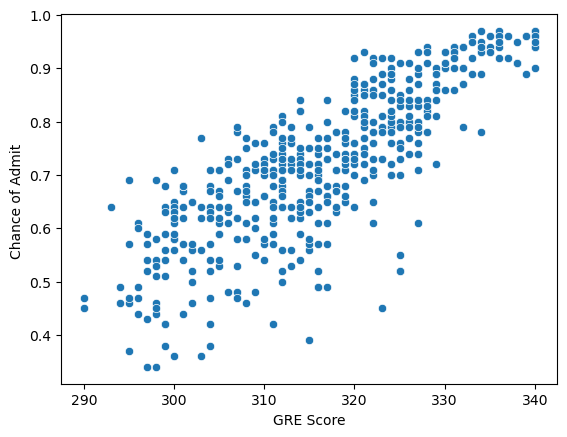

In [8]:
# Explore data
sns.scatterplot(data=df, x="GRE Score", y="Chance of Admit ")

In [9]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [21]:
# Split into trian and test datasets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 332 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   charges   936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


In [22]:
# Consider only smoker data
smokers = train_df[train_df.smoker == 'yes']
nonsmokers = train_df[train_df.smoker == "no"]

In [15]:
# Oooo big correlation between smokers and charges
smokers.corr()

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


In [16]:
nonsmokers.corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [23]:
# Train model
def trainModel(trainDF, x, y):
    slopes = []
    for i in range(len(trainDF)):
        slope = (trainDF.iloc[i]["charges"] - y) / (trainDF.iloc[i]["bmi"] - x)
        slopes.append(slope)
    
    return sum(slopes)/len(slopes)
b = 10000
m = trainModel(smokers, 0, b)
print("y = " + str(m) + "x + " + str(b))

y = 678.4007952598976x + 10000


In [24]:
# Determine how well model did
def testModel(testDF, m, b):
    checks = []
    for i in range(len(testDF)):
        predicted = (m*testDF.iloc[i]["bmi"] + b)
        actual = (testDF.iloc[i]["charges"])
        difference = abs(predicted - actual)
        if difference <= 1000:
            checks.append(1)
        else:
            checks.append(0)
    return (checks.count(1) / len(checks)) * 100

print(testModel(test_df, m, b)) # Not great. :( 

1.7412935323383085
